In [8]:
# This notebook is scatch work to implement data generation
# 80k set of coco data can be found here: https://pjreddie.com/projects/coco-mirror/

In [28]:
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Lambda, ToTensor, Resize
import matplotlib.pyplot as plt

import sys
sys.executable

'/Users/aakef/anaconda3/envs/dl-proj/bin/python3'

In [24]:
DATA_DIR=r"/Users/aakef/Documents/School/DeepLearning/PerceptualLossNetwork/dataset/"
BATCH_SIZE = 1
DIM = 256

In [25]:
class Generator(object):
    
    ''' 
        DATA_DIR: Path to folder containing folder of images 
            - See: https://pytorch.org/vision/stable/datasets.html#imagefolder
        
        BATCH_SIZE: Size of batches yielded by iterator
        
        dim: Desired single integer square dimensions of images
        
    '''
    
    def __init__(self, DATA_DIR:str, BATCH_SIZE:int, dim:int=256):
        self.dir = DATA_DIR
        self.batch_size = BATCH_SIZE
        self.dim = dim
        data_transformer = Compose([
                    Resize((dim, dim)),
                    ToTensor(),
                    Lambda(lambda x: x.mul(dim))
                    ])

        train = ImageFolder(DATA_DIR, data_transformer)
        self.train_loader = DataLoader(train, batch_size=BATCH_SIZE)
    
        
    def __iter__(self):
        return self.train_loader.__iter__()
        

In [40]:
def show_image(img:torch.Tensor):
    plt.figure()
    imT = img.permute((1, 2, 0))
    plt.imshow(imT/256, vmin=0, vmax=256)

def show_images(gen:Generator, batches:int=1):
    if batches > 0:
        print(f"Showing {batches} batches of size {gen.batch_size}")
    else:
        print(f"Showing all batches of size {gen.batch_size}")
    
    for bid, (batch, _) in enumerate(gen):
        if bid == batches:
            break
        else:
            for img in batch:
                show_image(img)

Showing 4 batches of size 1


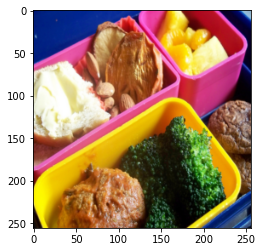

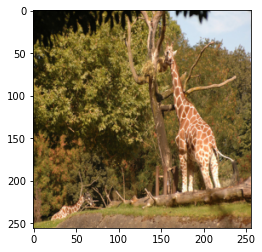

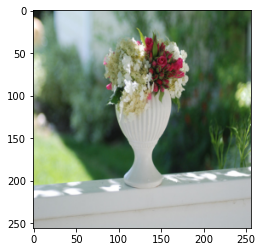

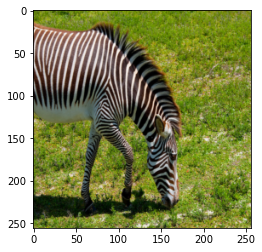

In [42]:
gen = Generator(DATA_DIR, BATCH_SIZE, dim=DIM)
show_images(gen, batches=4)